# **Nama : 2209106021**
# **NIM  : Bimasakti Cahyo Utomo**

Dataset : [Wine Quality Dataset (Kaggle)](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)


In [292]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/wine-quality-dataset")

Skipping, found downloaded files in "./wine-quality-dataset" (use force=True to force download)


## **Import Library**

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

## **Load dataset dan label**

In [294]:
df = pd.read_csv('/content/wine-quality-dataset/WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

## **Melihat cuplikan dataset**

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         

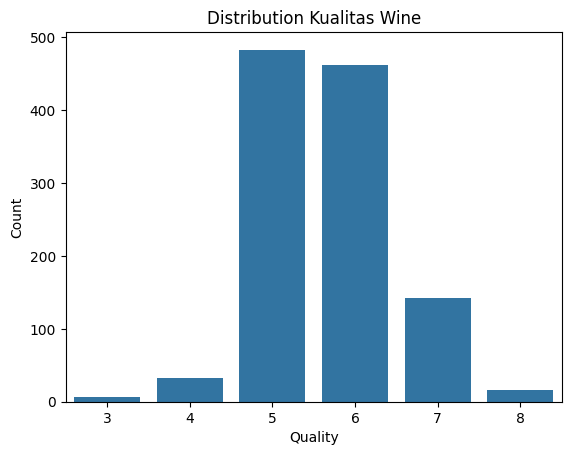

In [295]:
print(df.isnull().sum())

print(df.describe())

sns.countplot(x='quality', data=df)
plt.title('Distribution Kualitas Wine')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


## **Preprocessing Data**

### **Hapus Duplikat**


In [296]:
df.drop_duplicates(inplace=True)

### **Menghapus Kolom yang tidak terpakai**
Kolom quality di hapus karena meruapakan kolom pembanding

In [297]:
X = df.drop('quality', axis=1)
y = df['quality']

### Mengatasi Outlier dengan IQR
Digunakan untuk mengidentifikasi titik data yang berada jauh dari 50% bagian tengah data dan menghapus baris-baris tersebut dari dataset.

In [298]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

## **Train Test Split**
Membagi data set menjadi 2 bagian yaitu bagian train dan bagian test dengan rasio 1 : 5 `test_size=0.2`

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Standarisasi**
Menyiapkan data untuk digunakan dalam model machine learning dengan melakukan penskalaan (scaling) fitur-fitur agar memiliki rentang nilai yang seragam menggunakan Z-score normalization `scaler = StandardScaler()`

In [300]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Feature Engineering - PCA (Principal Component Analysis)**
PCA digu7nakan mengurangi dimensi dataset, dengan tetap mempertahankan 95% `pca = PCA(n_components=0.95)` variabilitas dari data asli. Dataset yang telah direduksi ini kemudian digunakan untuk melatih model machine learning.

In [301]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


## **Training dengan RandomForest**
Menggunakan RandomForest karena model lain menghasilkan akurasi yang lebih rendah

In [302]:
model = RandomForestClassifier(n_estimators=200, random_state=22)
model.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=200, random_state=22)

## **Evaluasi Akurasi dan Confusion Matrix**
Confusion matrix digunakan untuk melihat benar salah prediksi model.

In [303]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


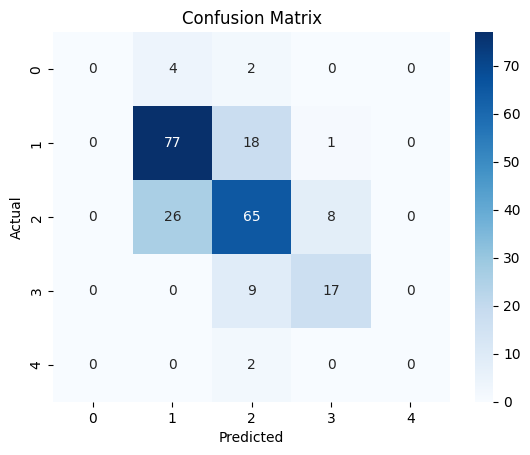

In [304]:
y_pred = model.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Clasification Report**

In [305]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.66      0.67        99
           7       0.65      0.65      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229



## **Test Acak**
Model melakukan prediksi acak menggunakan kolom dari dataset

In [306]:
random_indices = np.random.randint(0, len(X_test), size=10)

actual_qualities = []
predicted_qualities = []

for sample_idx in random_indices:
    sample_data = X_test.iloc[[sample_idx]]

    sample_scaled = scaler.transform(sample_data)

    sample_pca = pca.transform(sample_scaled)

    predicted_quality = model.predict(sample_pca)[0]
    actual_quality = y_test.iloc[sample_idx]

    actual_qualities.append(actual_quality)
    predicted_qualities.append(predicted_quality)

    print(f"Index sampel: {sample_idx}")
    print(f"Actual Quality: {actual_quality}")
    print(f"Predicted Quality: {predicted_quality}")
    print('-' * 30)

print("\nKesimpulan dari 10 prediksi acak:")
for i in range(10):
    print(f"Sample {i+1}: Actual = {actual_qualities[i]}, Predicted = {predicted_qualities[i]}")

Index sampel: 150
Actual Quality: 7
Predicted Quality: 7
------------------------------
Index sampel: 38
Actual Quality: 6
Predicted Quality: 7
------------------------------
Index sampel: 181
Actual Quality: 5
Predicted Quality: 5
------------------------------
Index sampel: 63
Actual Quality: 6
Predicted Quality: 6
------------------------------
Index sampel: 11
Actual Quality: 6
Predicted Quality: 6
------------------------------
Index sampel: 95
Actual Quality: 5
Predicted Quality: 5
------------------------------
Index sampel: 84
Actual Quality: 6
Predicted Quality: 5
------------------------------
Index sampel: 148
Actual Quality: 5
Predicted Quality: 5
------------------------------
Index sampel: 59
Actual Quality: 5
Predicted Quality: 5
------------------------------
Index sampel: 45
Actual Quality: 5
Predicted Quality: 5
------------------------------

Kesimpulan dari 10 prediksi acak:
Sample 1: Actual = 7, Predicted = 7
Sample 2: Actual = 6, Predicted = 7
Sample 3: Actual = 5